## 쇼핑몰 데이터 분석 프로젝트
# 선택3. 쇼핑몰 데이터 분석

https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

- Customer Purchase Patterns and Demographics
- [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset)  walmart.csv
- 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포 확인
- VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)

In [13]:
## 데이터 로드

import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\user\\Downloads\\data_anal_proj\\walmart.csv")
df.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
# [[추가!!]] VIP와 VVIP를 미리 추출
user_purchase = df.groupby('User_ID').agg({
    'Purchase': 'sum',
    'Gender': 'first',
    'Age': 'first',
    'Occupation': 'first',
    'City_Category': 'first',
    'Stay_In_Current_City_Years': 'first',
    'Marital_Status': 'first'
}).reset_index()

vvip_users = user_purchase.nlargest(30, 'Purchase') #구매액 상위 30명
vip_users = user_purchase.nlargest(300, 'Purchase') #구매액 상위 300명

In [15]:
df.info() #컬럼의 개수 및 종류 그리고 각 컬럼의 데이터 타입 동시에 확인, null은 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [17]:
## 삭제할 컬럼 선택 : ID정보는 제품의 판매 동향, 소비자 성향 등과 관련이 없으므로 제외
df = df.drop(columns=['User_ID','Product_ID'])
df.info() #삭제된 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.6+ MB


In [19]:
print(df.describe(include='object')) #문자형 컬럼에 대한 정보들도 종합적으로 확인

        Gender     Age City_Category Stay_In_Current_City_Years
count   550068  550068        550068                     550068
unique       2       7             3                          5
top          M   26-35             B                          1
freq    414259  219587        231173                     193821


In [21]:
# Age 열 범주형 값을 숫자형으로 변환, 가시성을 위해 매핑으로 진행,
df['Age'] = df['Age'].map({'0-17': 1,'18-25': 2,'26-35': 3,'36-45': 4,'46-50': 5,'51-55': 6,'55+': 7})  
df['Gender'] = df['Gender'].map({'M': 0,'F': 1})  #
df['City_Category'] = df['City_Category'].map({'A': 1,'B': 2,'C': 3})  
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace("4+", 4).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 31.5 MB


In [11]:
### 시각화 ###

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df.info() #결측값 없는 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 31.5 MB


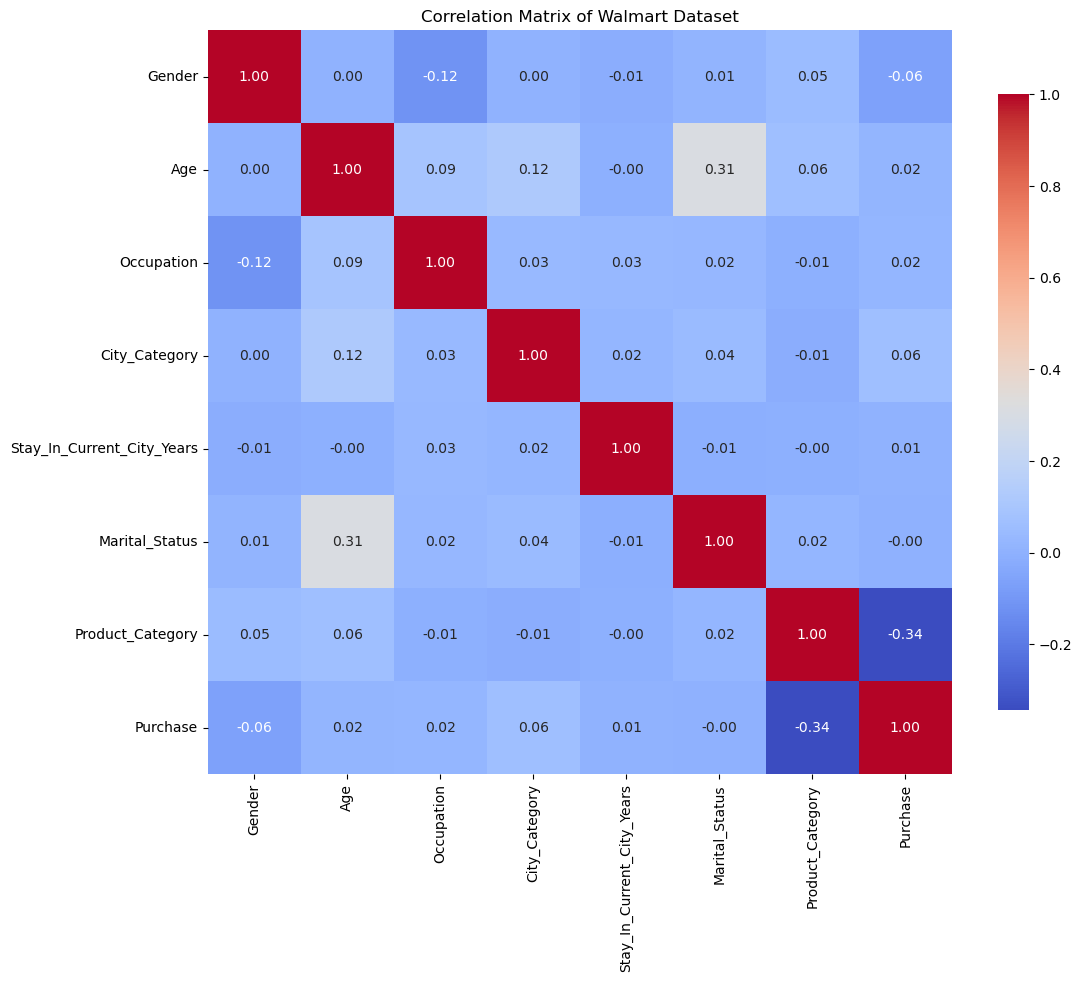

In [27]:
# 각 컬럼간의 상관관계를 히트맵으로 표현
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Walmart Dataset")
plt.show()

In [29]:
plt.rc('font', family='Malgun Gothic') #한글화

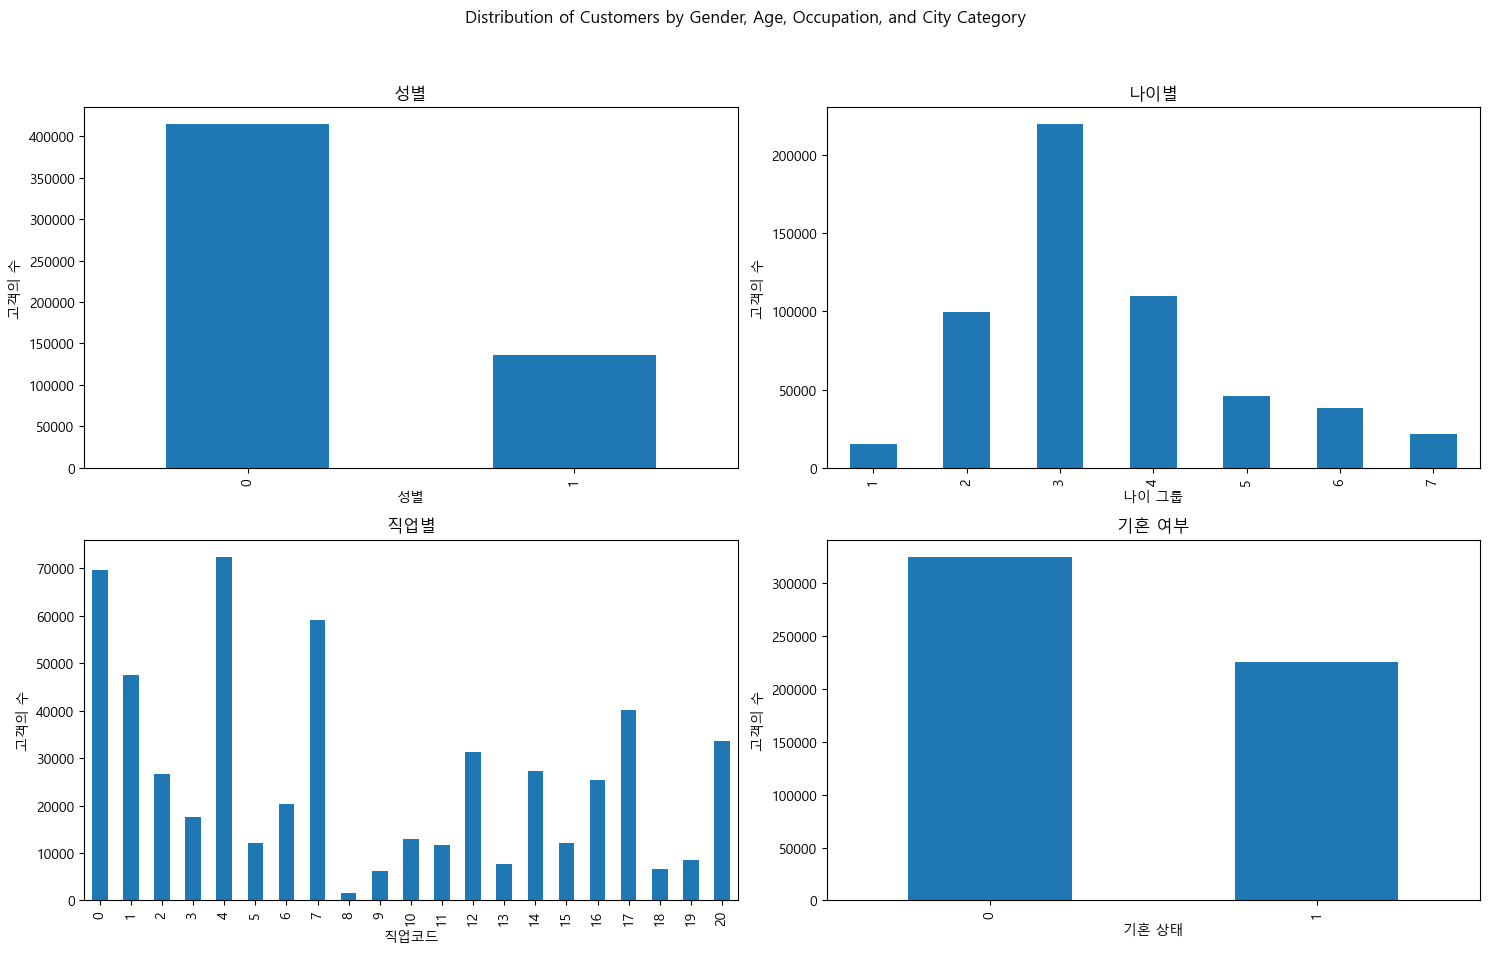

In [31]:
# 일단은 성별과 나이별, 직업별, 도시별로 어떠한 손님들이 주로 방문하는지 체크

# 그림 크기 및 레이아웃 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Customers by Gender, Age, Occupation, and City Category")

# 성별 분포
df['Gender'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('성별')
axs[0, 0].set_xlabel('성별')
axs[0, 0].set_ylabel('고객의 수')

# 연령대 분포
df['Age'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('나이별')
axs[0, 1].set_xlabel('나이 그룹')
axs[0, 1].set_ylabel('고객의 수')

# 직업 분포
df['Occupation'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('직업별')
axs[1, 0].set_xlabel('직업코드')
axs[1, 0].set_ylabel('고객의 수')

# 기혼 여부 분포
df['Marital_Status'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('기혼 여부')
axs[1, 1].set_xlabel('기혼 상태')
axs[1, 1].set_ylabel('고객의 수')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Walmart 고객 분포 분석

### 1. 성별 분포
- 남성(0)이 여성(1)보다 고객 수가 약 2배 이상 많다. 이는 주 고객층이 남성임을 시사하며, 마케팅 전략 수립 시 남성 고객을 주요 타겟으로 고려할 필요가 있으며 여성 고객 제품 확대시 추가적인 매출 확대도 가능할 것으로 보인다. 

### 2. 나이별 분포
- 나이 그룹 중 26-35세(3)와 18-25세(2) 고객이 가장 많으며, 그 뒤를 36-45세(4) 고객이 잇고 있다. 이 세 그룹을 타깃으로 하는 프로모션의 효과가 클 것으로 예상, 그 외 나이대에 대한 제품군은 시장 기호를 파악하고 확대하는 것 역시 필요할 것으로 보인다. 

### 3. 직업별 분포
- 다양한 직업군에서 고객이 분포하고 있으며, 특히 0, 1, 4, 7 코드의 직업군이 많은 비율을 차지, 이를 통해 직업에 따라 구매 패턴이 다를 수 있으므로, 상위 직업군을 대상으로 한 맞춤형 마케팅 전략이 필요합니다. 즉 특정 직업군에서 선호하는 상품군을 분석하여 집중 프로모션을 진행하면 효과를 극대화할 수 있을듯

### 4. 기혼여부별 분포
- 미혼 고객이 더 많기 때문에, 이들에 맞춘 프로모션과 상품 구성이 효과적일 수 있음. 그러나 기혼 고객도 적지 않으므로, 가족 단위 또는 가정용 제품군에 대한 마케팅도 유효할 것

<Figure size 1200x800 with 0 Axes>

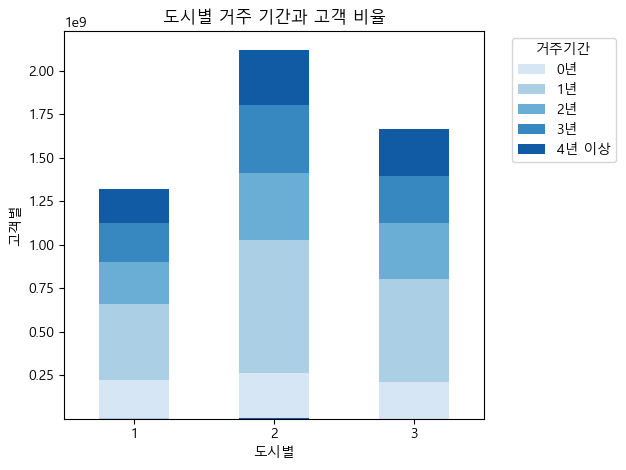

In [33]:
plt.figure(figsize=(12, 8))# 그래프 크기 설정

# 도시 카테고리와 거주 기간에 따른 고객 수 계산 
df.groupby(['City_Category', 'Stay_In_Current_City_Years']).sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=sns.color_palette("Blues", n_colors=5)) 
# 도시별, 거주기간별로 그룹화해 합한 값을 누적 그래프로 표현

plt.title("도시별 거주 기간과 고객 비율")
plt.xlabel("도시별")
plt.ylabel("고객별")
plt.xticks(rotation=0)

legend_labels = ["0년", "1년", "2년", "3년", "4년 이상"]
plt.legend(title="거주기간", labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 5. 도시별 거주기간별 고객 비율
- **도시 2(B)의 인구가 가장 많으므로**에 맞춘 마케팅 전략을 강화할 수 있습니다. 해당 지역에 맞는 맞춤형 프로모션이나 상품 구성을 고려.
- 모든 도시에 **새롭게 유입된 고객**이 많은 점을 활용해, 신규 고객을 타겟으로 한 초기 할인 및 멤버십 혜택, 제품군 선정 같은 전략을 도입하면 효과적일듯.

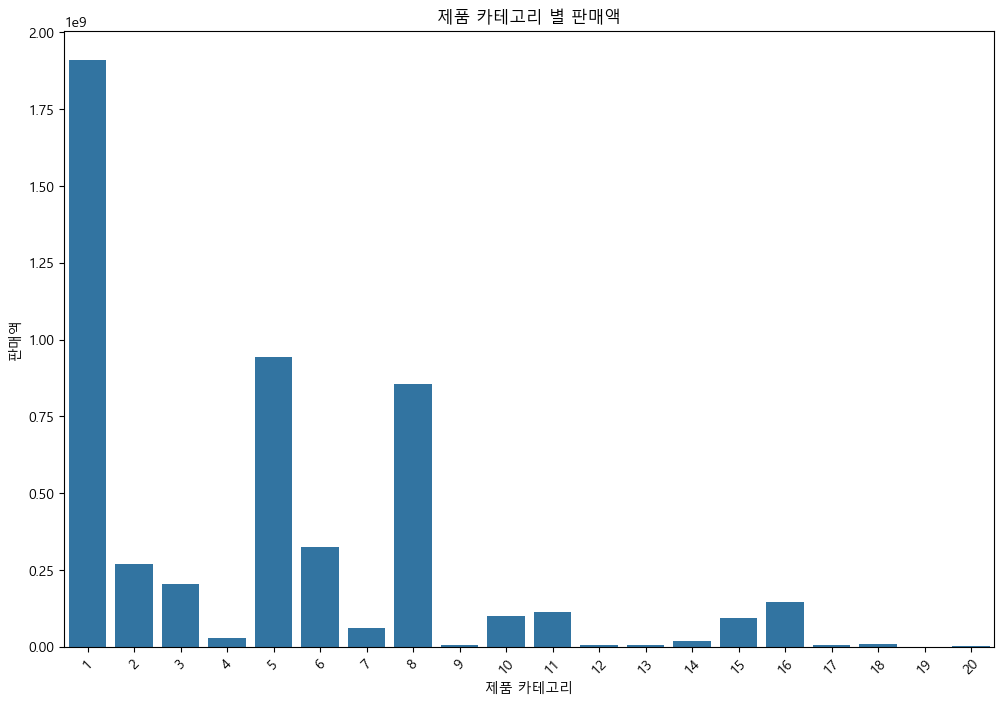

In [35]:
product_sales = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False) # 제품 유형별 총 매출 계산

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("제품 카테고리 별 판매액")
plt.xlabel("제품 카테고리")
plt.ylabel("판매액")
plt.xticks(rotation=45)
plt.show()

# Walmart 제품 카테고리별 판매액 분석

 **주요 매출 카테고리**
   - **카테고리 1**이 다른 모든 제품군을 압도하며 가장 높은 매출을 기록했으며 그 수요가 매우 강함을 알 수 있었으며 **카테고리 5**와 **카테고리 8**이 그 뒤를 이어 높은 매출을 차지, 해당 제품군이 가장 인기가 많았음을 확인할 수 있었음. 

   - **그 외 카테고리**는 1,5,8 카테고리에 비해 현저히 적은 매출 성과만을 보이는 중인 것으로 보임. 단순히 수요가 낮은 제품이 아니라면 제품의 인지도, 마케팅의 부족함인지 확인하고 추가적인 조치를 고안해봐야 할듯

   - **최종적으로** 그 방향성을 구체화하기 위해 제품 카테고리 별로 어떠한 유형의 고객들이 있는지 파악해 실질적인 개선 방안을 모색하고자 함. 

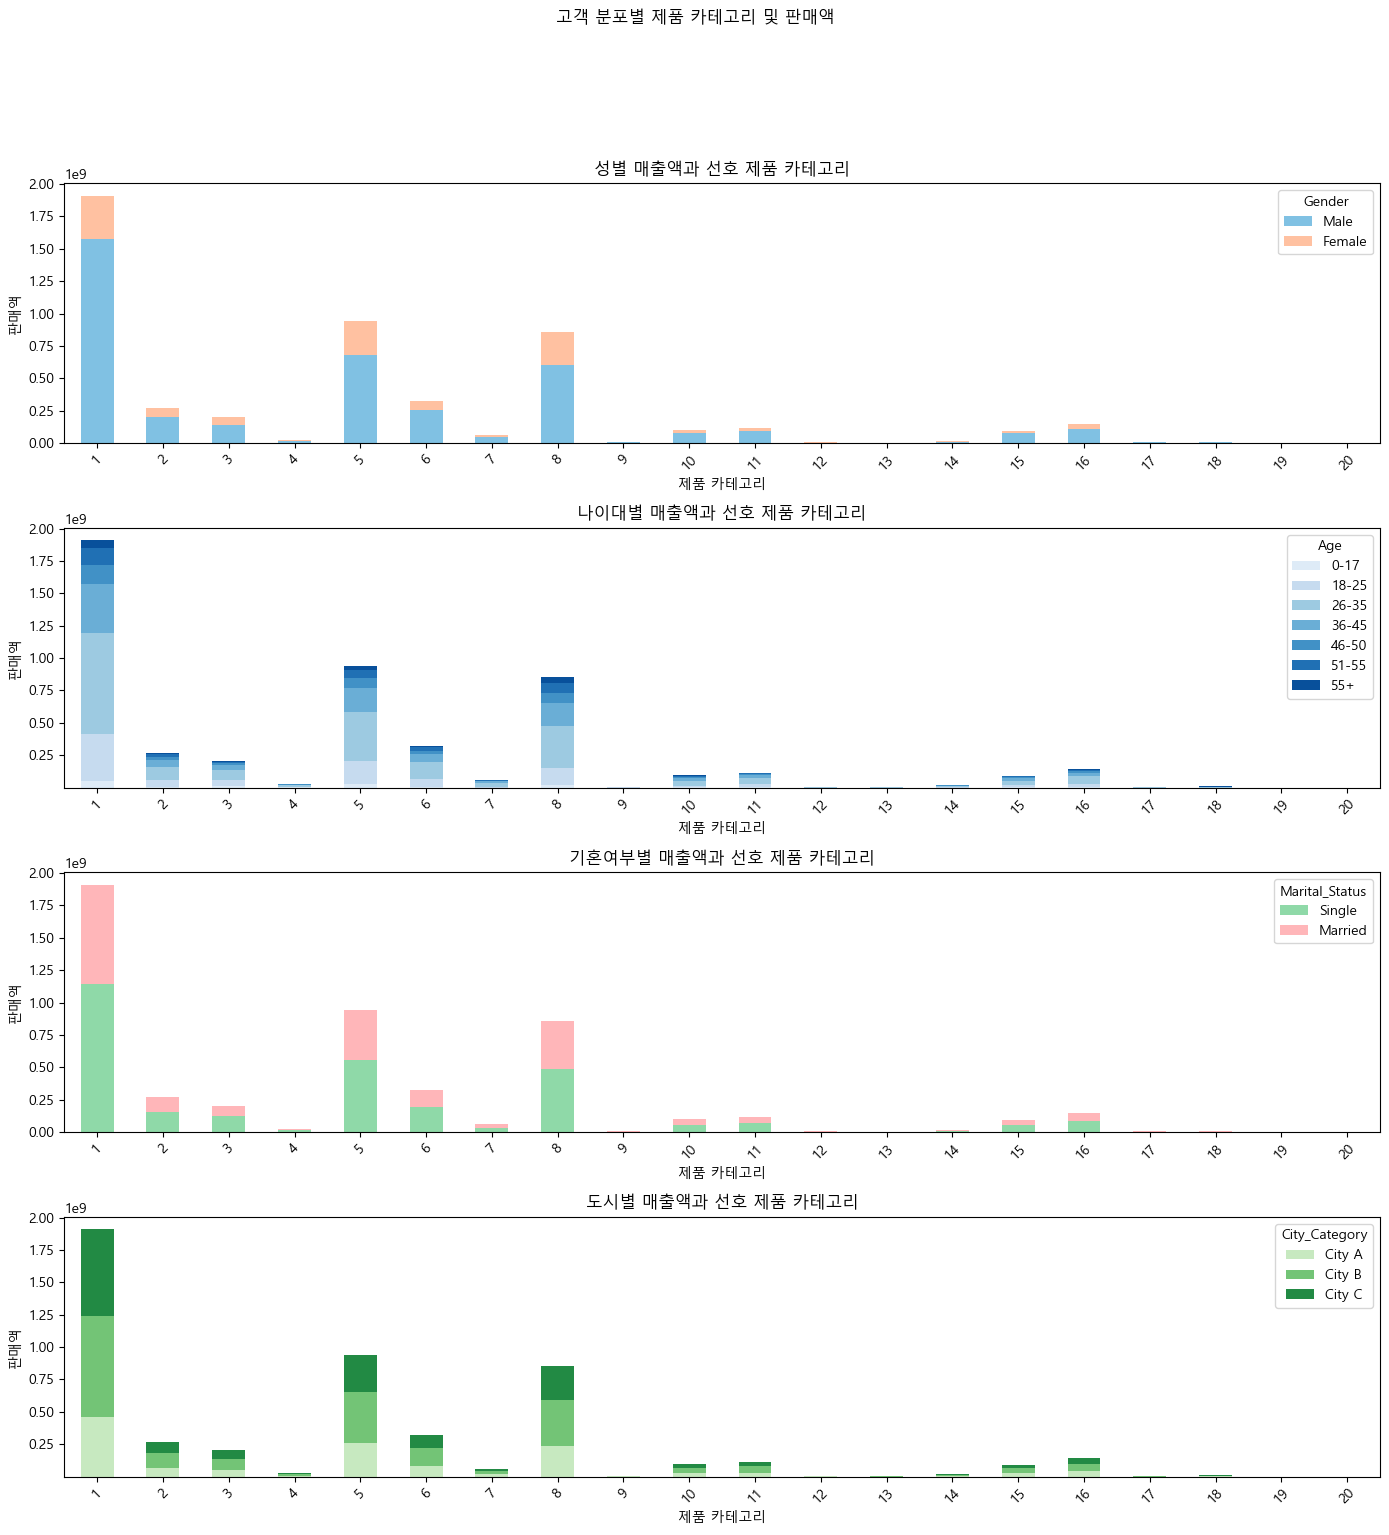

In [37]:
# 고객별 정보( : 성별, 기혼 여부, 지역별, 나이 그룹)에 따른 매출 분석을 위한 그룹 리스트
group_by_list = [
    ('Gender', ['#80C1E3', '#FFC1A1'], "성별 매출액과 선호 제품 카테고리", ["Male", "Female"]),
    ('Age', sns.color_palette("Blues", n_colors=7), "나이대별 매출액과 선호 제품 카테고리", ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]),
    ('Marital_Status', ['#8FD9A8', '#FFB6B9'], "기혼여부별 매출액과 선호 제품 카테고리", ["Single", "Married"]),
    ('City_Category', sns.color_palette("Greens", n_colors=3), "도시별 매출액과 선호 제품 카테고리", ["City A", "City B", "City C"])

]

# 그림 크기 설정 및 서브플롯 생성
fig, axs = plt.subplots(len(group_by_list), 1, figsize=(14, 15)) #가로로 길게 하여 단번에 파악할 수 있게끔 가시성을 높임
fig.suptitle("고객 분포별 제품 카테고리 및 판매액", y=1.02)

# 각 그룹별 누적 막대 그래프 생성, 이때 그래프에 입력될 라벨값들을 위에서 생성한 리스트의 튜플 요소들 값으로 불러옴
for i, (group, colors, title, legend_labels) in enumerate(group_by_list):

    df.groupby(['Product_Category', group])['Purchase'].sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors, ax=axs[i], legend=False)
    # 누적 막대 그래프, 순서대로 해석하면 우선 그룹화 시켜 이를  sum하여 행을 열로 변환*unstack시켜 결측치를 제거한다. 즉 하나의 막대를 쪼개는 역할
    axs[i].set_title(title) #타이들을 변수로 받아옴
    axs[i].set_xlabel("제품 카테고리")
    axs[i].set_ylabel("판매액")
    axs[i].tick_params(axis='x', rotation=45)
    
    # 범례를 설정해 그래프의 가시성을 높임
    handles, _ = axs[i].get_legend_handles_labels() #그래프의 내용이 담긴 객체를 불러와 그래의 대한 것은 handles객체에 저장
    axs[i].legend(handles, legend_labels, title=group, loc='upper right') #해당 객체에 대해 범례를 리스트로 저장된 객체(legend_labels)로 불러와 표현

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Walmart 제품 카테고리별 매출 분석 (성별, 나이대, 기혼 여부, 도시별)

### 1. 성별 매출과 선호 제품 카테고리
  - **카테고리 1**에서 남성의 매출이 압도적으로 높으며, **카테고리 5와 8**에서도 남성이 높은 매출을 보임
  - 남성 고객을 대상으로 한 마케팅이 효과적일 가능성이 높으며, 여성 고객의 선호도가 상대적으로 높은 제품군과 여성이 선호하는 제품에 대한 확대가 필요해보임.

### 2. 나이대별 매출과 선호 제품 카테고리
  - **26-35세와 18-25세 고객이 Walmart의 주요 소비층**으로 보이며, 이들 연령대에 맞춘 상품 구성이 효과적일 수 있습니다. 특히, 26-35세 연령대는 주요 제품 카테고리에서 높은 매출을 보이고 있어 집중적인 마케팅이 필요합니다.

### 3. 기혼 여부에 따른 매출과 선호 제품 카테고리
  - **카테고리 1**과 **카테고리 5**에서 미혼 고객의 매출이 두드러지며, 이는 Walmart의 주요 매출을 차지하는 고객층이 미혼임을 시사
  - 미혼 고객을 위한 마케팅 전략이 효과적일 가능성이 높음. 기혼 고객이 선호하는 카테고리 8에 대해서는 가족 단위의 프로모션이나 혜택을 제공하면 매출에 도움이 될 것

### 4. 도시별 매출과 선호 제품 카테고리
- 도시 B를 중심으로 한 마케팅 전략이 유효할 가능성이 높음. 그러나 도시 A와 C도 상대적으로 큰 매출을 기록하고 있으므로, 이들 지역을 대상으로 한 맞춤형 캠페인도 고려하면 매출에 도움이 될 것

# Walmart 구매액 상위 1만명 고객에 대한 분포 분석

- **VIP 고객 특성**:
  - 성별: 남성 고객 비율이 높음
  - 나이대: 26-35세가 가장 많으며, 18-45세 연령대가 주를 이룸
  - 직업: 직업군(코드 0, 4, 7, 17)에 고객이 가장 많았음
  - 기혼 여부: 미혼 고객 비율이 높음
  - 지역: City B와 City C에 많이 분포
  
- **최종**:
  - 주요 연령대인 18-45세, 특히 26-35세를 타겟으로 한 프로모션을 진행
  - 남성 고객을 위한 맞춤형 상품 및 서비스를 제공
  - 미혼 고객의 라이프스타일에 맞춘 제품 추천 및 혜택 제공
  - City B와 City C 지역에 특화된 로컬 마케팅 강화

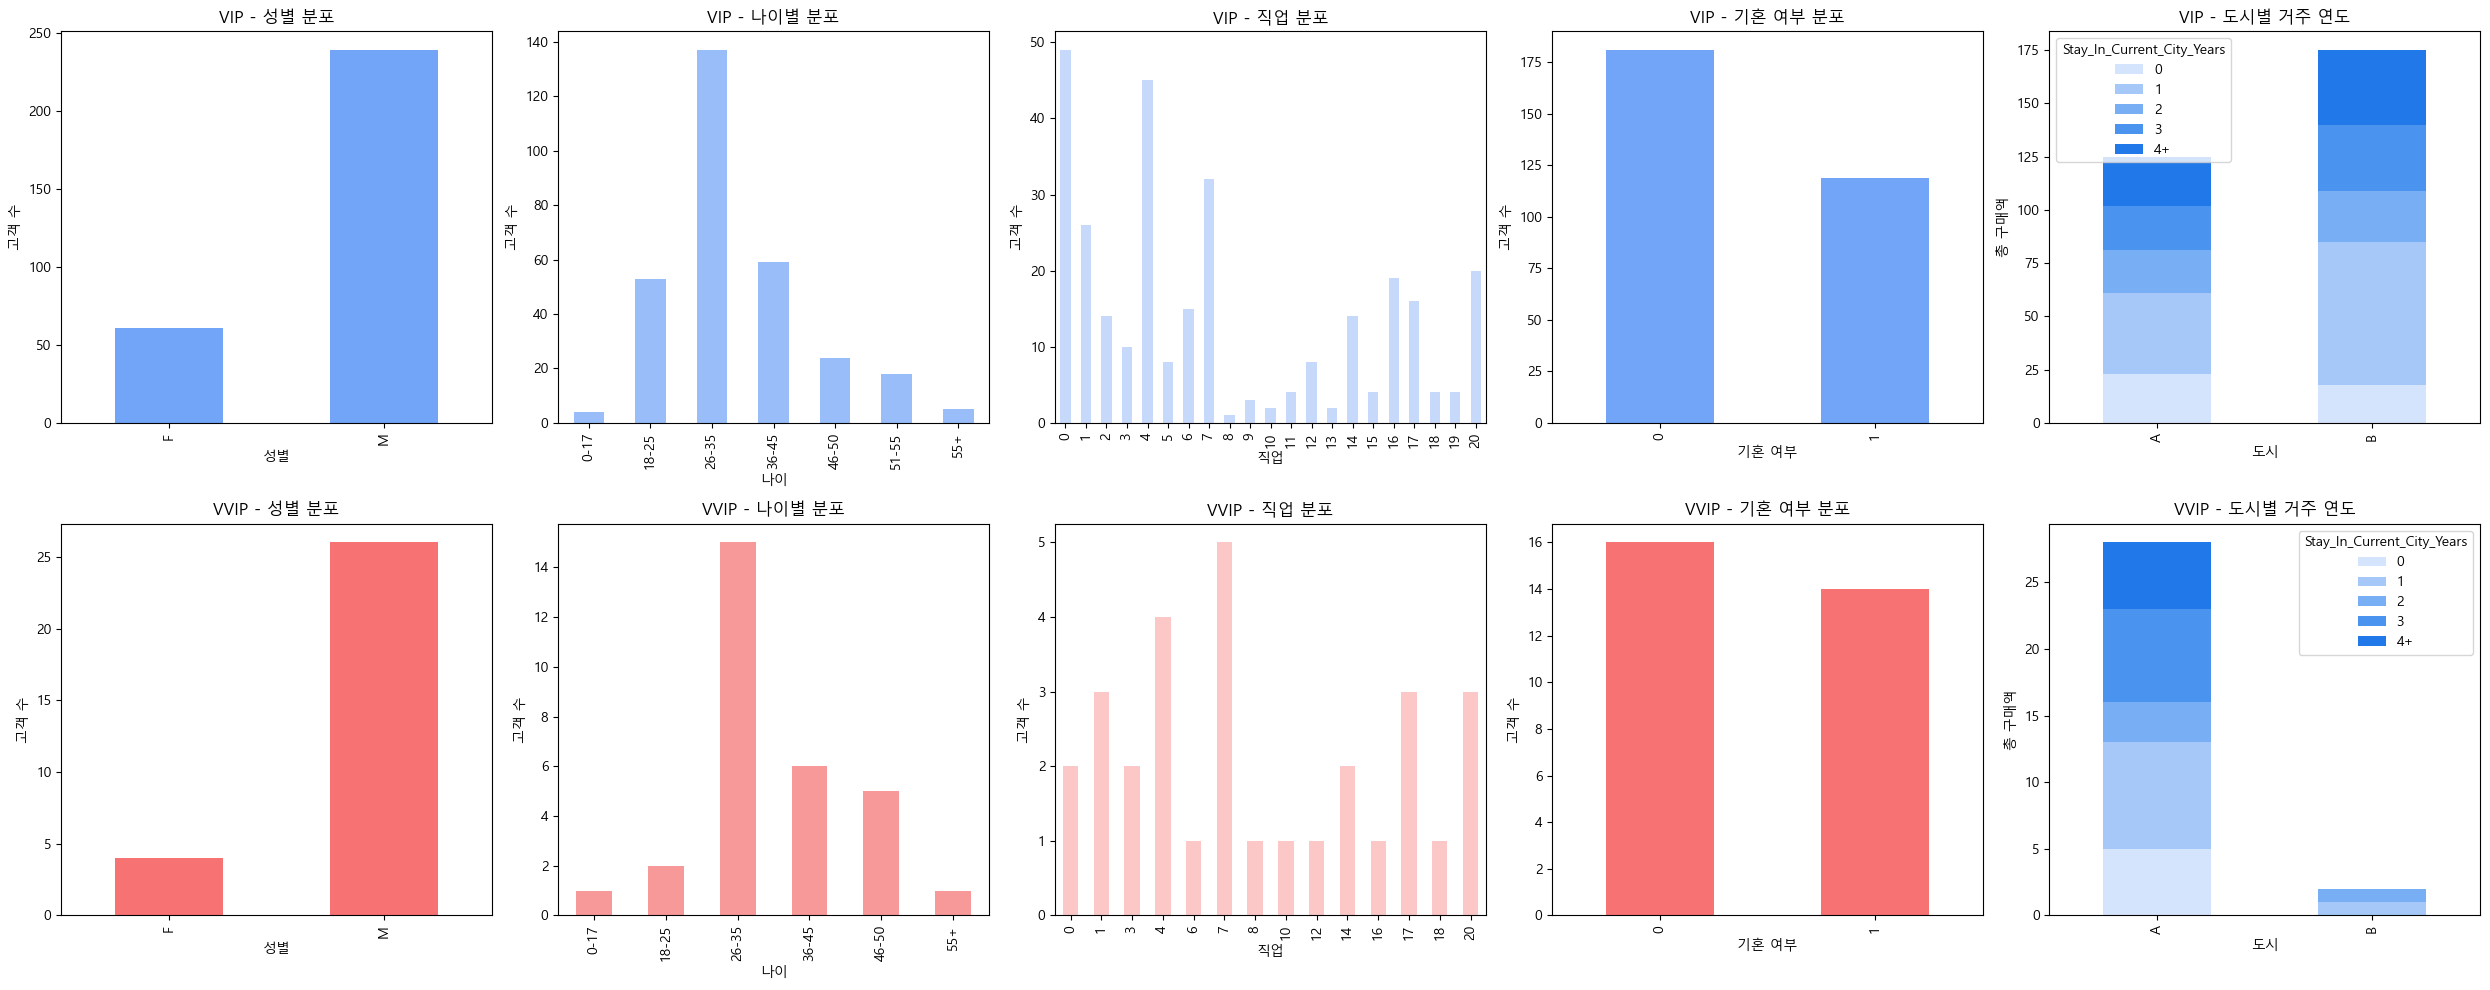

In [40]:
# [[추가!!]] 그래프를 그리기 위한 데이터 준비
attributes = ['Gender', 'Age', 'Occupation', 'Marital_Status', 'City_Category']
titles = ['성별', '나이', '직업', '기혼 여부', '도시']
vip_labels = ['VIP - 성별 분포', 'VIP - 나이별 분포', 'VIP - 직업 분포', 'VIP - 기혼 여부 분포', 'VIP - 도시별 거주 연도']
vvip_labels = ['VVIP - 성별 분포', 'VVIP - 나이별 분포', 'VVIP - 직업 분포', 'VVIP - 기혼 여부 분포', 'VVIP - 도시별 거주 연도']

fig, axs = plt.subplots(2, 5, figsize=(25, 10))

colors_vip = ["#72a4f7", "#99bdf9", "#c7d9fb"]
colors_vvip = ["#f77272", "#f79999", "#fbc7c7"]
stay_colors = ["#d4e4fc", "#a5c8f8", "#78aef4", "#4a94f0", "#2179e9"]

for idx, (attr, title) in enumerate(zip(attributes, titles)):
    if idx < 4:  # 첫 4개의 그래프는 기본 막대 그래프로 그림, 단순한 데이터 구조이기 때문에
        # VIP 분포 그래프
        vip_users[attr].value_counts().sort_index().plot(kind='bar', color=colors_vip[idx % len(colors_vip)], ax=axs[0, idx], title=vip_labels[idx])
        axs[0, idx].set_xlabel(title)
        axs[0, idx].set_ylabel("고객 수")

        # VVIP 분포 그래프
        vvip_users[attr].value_counts().sort_index().plot(kind='bar', color=colors_vvip[idx % len(colors_vvip)], ax=axs[1, idx], title=vvip_labels[idx])
        axs[1, idx].set_xlabel(title)
        axs[1, idx].set_ylabel("고객 수")
    else:  
        # VIP 도시별 거주 연도 누적 그래프
        vip_city_years = vip_users.groupby(['City_Category', 'Stay_In_Current_City_Years']).size().unstack().fillna(0)
        vip_city_years.plot(kind='bar', stacked=True, color=stay_colors, ax=axs[0, idx], title=vip_labels[idx])
        axs[0, idx].set_xlabel(title)
        axs[0, idx].set_ylabel("총 구매액")

        # VVIP 도시별 거주 연도 누적 그래프
        vvip_city_years = vvip_users.groupby(['City_Category', 'Stay_In_Current_City_Years']).size().unstack().fillna(0)
        vvip_city_years.plot(kind='bar', stacked=True, color=stay_colors, ax=axs[1, idx], title=vvip_labels[idx])
        axs[1, idx].set_xlabel(title)
        axs[1, idx].set_ylabel("총 구매액")

# 범례 위치 조정
plt.tight_layout()
plt.show()


# Walmart고객중 VIP 및 VVIP 고객 분석

- **성별**: VIP와 VVIP 모두 남성이 더 많음. 
- **연령대**: VIP와 VVIP 모두 26-35세,36-45세가 가장 많았지만 VIP는 다음으로 18-25세가 많았으며 VVIP는 46-50세가 많았음.
- **직업**: VIP는 0번과 4번 직업이 가장 많고 8번 직업이 가장 적었으며 반대로 VVIP에선 7번 직업이 가장 많았음.
- **기혼 여부**: VIP와 VVIP 모두 미혼인 회원이 더 많음.
- **거주지**: VIP에선 B도시출신이 A도시 출신에 비해 많았으며 VVIP에선 A도시 출신이 B도시 출신에 비해 많았음. A도시의 구매력이 상당한 것으로 추측, 반대로 C도시는 회원이 가장 많음에도 불구하고 구매력이 가장 떨어지는 것을 유추, C도시를 중심으로한 프로모션이 매출 향상에 실질적인 도움을 줄 수 있을 것으로 기대됨.